MNIST Images: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
MNIST Lables: [5 0 4 ... 5 6 8]
Digit 0
Mnist Images 5923
Mnist Labels 5923
Digit 1
Mnist Images 6742
Mnist Labels 6742
Digit 2
Mnist Images 5958
Mnist Labels 5958
Digit 3
Mnist Images 6131
Mnist Labels 6131
Digit 4
Mnist Images 5842
Mnist Labels 5842
Digit 5
Mnist Images 5421
Mnist Labels 5421
Digit 6
Mnist Images 5918
Mnist Labels 5918
Digit 7
Mnist Images 6265
Mnist Labels 6265
Digit 8
Mnist Images 5851
Mnist Labels 5851
Digit 9
Mnist Images 5949
Mnist Labels 5949


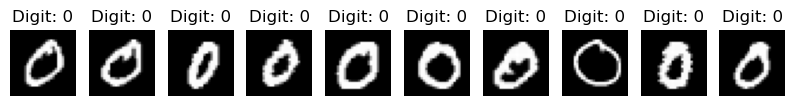

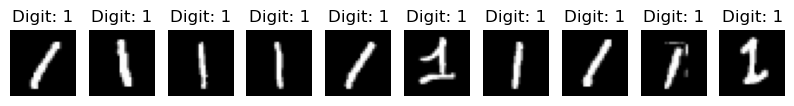

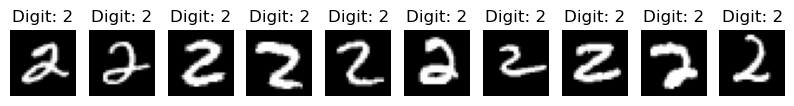

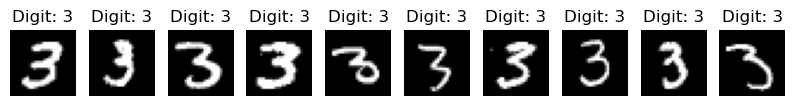

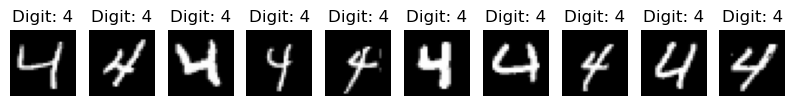

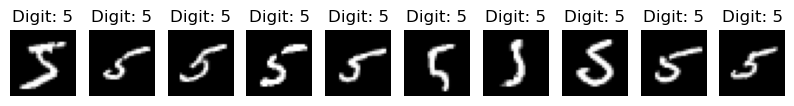

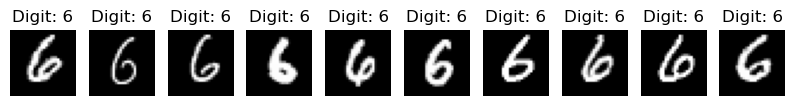

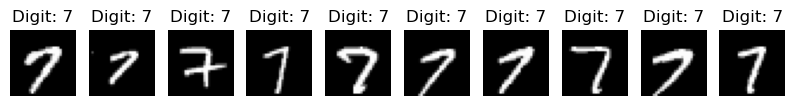

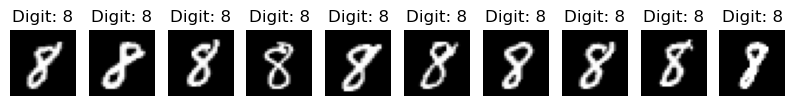

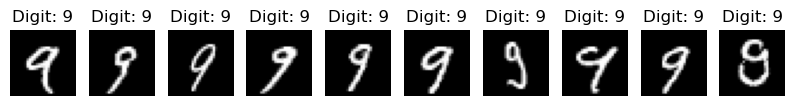

c:\Users\Akshay Patil\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


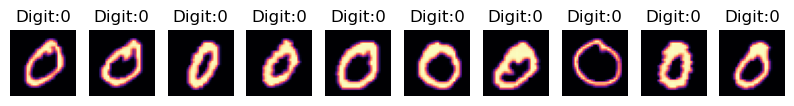

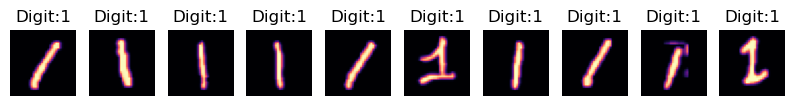

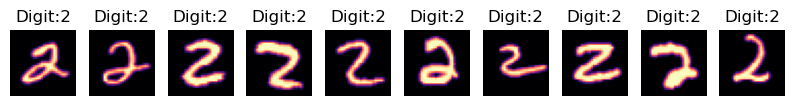

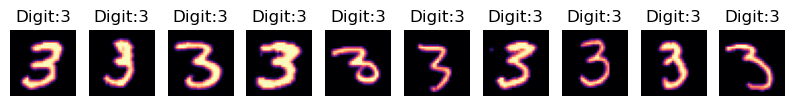

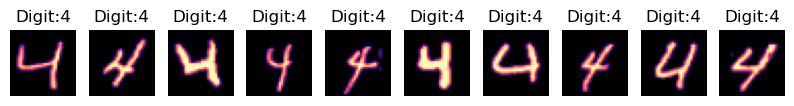

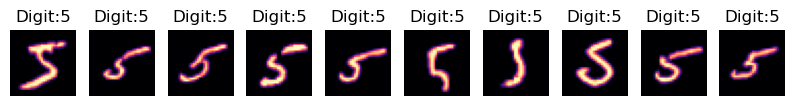

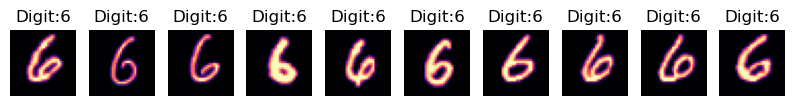

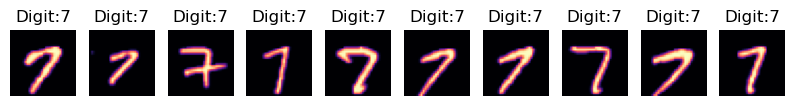

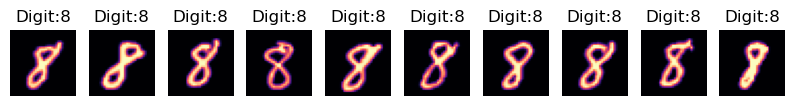

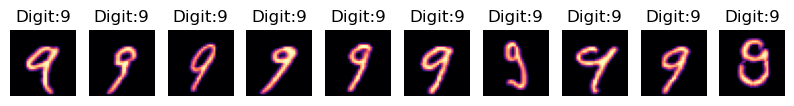

Digit zero [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit one [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit two [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit three [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit four [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Digit fifth [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]

In [1]:
# Quantum Linearized Network - 

# Five Approaches have been tried to implement the algorithm discussed in paper - But only this one is working for now , and research is currently going on in the remaining
# Approaches , but this CNN approach requires Quantum Features to work and hence demands the Classical Preprocessing via NN , a way which was not intended to be used ,
# but unfortunately diverse training of unitary (as we dont yet how to cross corelate the unitaries - Because form our paper - Deterministic INrterpretation of NN we can safely say
# NN are having (B**A)*d paths , where A is the number of piecewise linearities of the Activation Function and B is the size of the vector and d is the depth of the NN , with each path
# leading to linear equation at the end , but the weights and biases for all path remain the same , it is only the range of element x and hence the piecewise fucntion that it approximates
# changes ...) - We via the algorithm paper wanted to find the paths and crosscorelation to simulate this paths for given datasets manually , but more research is neede in this...
# So for now we have implemented 2nd approach....    
# ) directly does not work given the features of train for test data , it tends to overfit .

# Five Approaches -

#1. Separate UNitary for each sample vector of the training data to learn the feature vectors.
#2. Quantum Features Extraction via CNN and then using Quantum Circuits for Future Inference - Draw Back - Train CNN needs to used to infer quantum features from New Test Data
#3. SVM Scoring Approach - Multiunitary for different Classes and also for different data points within classes - Various Strategies of SVM - Works  - This can be a substitute to method 1 - Will be uploaded later 
#4. Converting the Input Vector to VanderMonde Matrix (Various Polynomial Basis can be used) and then Making it unitary by Unitary Encoding - Research in Progress - But no any advantage in preliminary results  
#5. Kernalization by addition of Features to the amplitude encocding - As MNIST is degree 2 dataset , so degree 2 features and cross realated Degree 1 features will suffice - Kernalization - Only Linear UNitary will 
# will be able to distinguish the Kernel Vectors into their respective classes , without any changes to the architecture. 

# Quantum Amplitude Encoding
import idx2numpy
import numpy as np
import torch
from PIL import Image


def load_MNIST_dataset_Images(file_path): # for now trial on mnist dataset
    images = idx2numpy.convert_from_file(file_path)
    images = images.reshape(images.shape[0], -1)
    images = images.astype(np.float64)
    return images

def load_MNIST_dataset_Labels(file_path):
    labels = idx2numpy.convert_from_file(file_path)
    return labels

# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
train_images_file = r"D:\Downloads Now\archive\train-images.idx3-ubyte"
train_labels_file = r"D:Downloads Now\archive\train-labels.idx1-ubyte"

mnist_images = load_MNIST_dataset_Images(train_images_file)
mnist_labels = load_MNIST_dataset_Labels(train_labels_file)

print('MNIST Images:', mnist_images)
print('MNIST Lables:', mnist_labels)


# Separating the load dataset into train labels and the train digits 

def separate_images_and_labels(images , labels , digit):
    digit_images = []
    digit_labels = []
    for image,label in zip(images,labels):
        if label == digit:
            digit_images.append(image)
            digit_labels.append(label)
    return digit_images,digit_labels

digits_to_separate = [0,1,2,3,4,5,6,7,8,9]

digit_image = {}
digit_label = {}

for digit in digits_to_separate:
    digit_image[digit], digit_label[digit] = separate_images_and_labels(mnist_images,mnist_labels,digit)

for digit in digits_to_separate:
    print('Digit', digit)
    print('Mnist Images', len(digit_image[digit]))
    print('Mnist Labels', len(digit_label[digit]))

import matplotlib.pyplot as plt

num_samples = 10 

for digit in digit_image.keys():
    sample_images = digit_image[digit][:num_samples]
    plt.figure(figsize = (10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(sample_images[i].reshape(28,28), cmap = 'gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.show()

# Resize the image to a higher accuracy and match the dimensions of the qubits
N = 32
from skimage.transform import resize

def resize_images(images, new_size = (N,N)):
    resized_images = []
    for image in images:
        resized_image = resize(image.reshape(28,28), new_size)
        resized_images.append(resized_image.flatten())
    return resized_images

new_size = (N,N)

resized_digit_images = {}
for digit in digit_image.keys():
    resized_digit_images[digit] = resize_images(digit_image[digit], new_size = new_size)

for digit in digit_image.keys():
    sample_images = resized_digit_images[digit][:num_samples]
    plt.figure(figsize =(10,2))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(sample_images[i].reshape(new_size), cmap = 'magma')
        plt.title(f"Digit:{digit}")
        plt.axis('off')
    plt.show()

# Converting all the digits in to arrays

Digit_zero = []

for image in resized_digit_images[0]:
    Digit_zero_ = image
    Digit_zero.append(Digit_zero_)

Digit_zero = np.array(Digit_zero)

print('Digit zero',Digit_zero)

Digit_one = []

for image in resized_digit_images[1]:
    Digit_one_ = image
    Digit_one.append(Digit_one_)

Digit_one = np.array(Digit_one)

print('Digit one',Digit_one)

Digit_two = []

for image in resized_digit_images[2]:
    Digit_two_ = image
    Digit_two.append(Digit_two_)

Digit_two = np.array(Digit_two)

print('Digit two',Digit_two)

Digit_three = []

for image in resized_digit_images[3]:
    Digit_three_ = image
    Digit_three.append(Digit_three_)

Digit_three = np.array(Digit_three)

print('Digit three',Digit_three)

Digit_four = []

for image in resized_digit_images[4]:
    Digit_four_ = image
    Digit_four.append(Digit_four_)

Digit_four = np.array(Digit_four)

print('Digit four',Digit_four)

Digit_fifth = []

for image in resized_digit_images[5]:
    Digit_fifth_ = image
    Digit_fifth.append(Digit_fifth_)

Digit_fifth = np.array(Digit_fifth)

print('Digit fifth',Digit_fifth)

Digit_sixth = []

for image in resized_digit_images[6]:
    Digit_sixth_ = image
    Digit_sixth.append(Digit_sixth_)

Digit_sixth = np.array(Digit_sixth)

print('Digit Sixth',Digit_sixth)

Digit_seventh = []

for image in resized_digit_images[7]:
    Digit_seventh_ = image
    Digit_seventh.append(Digit_seventh_)

Digit_seventh = np.array(Digit_seventh)

print('Digit seventh',Digit_seventh)

Digit_eigth = []

for image in resized_digit_images[8]:
    Digit_eigth_ = image
    Digit_eigth.append(Digit_eigth_)

Digit_eigth = np.array(Digit_eigth)

print('Digit eigth',Digit_eigth)

Digit_nineth = []

for image in resized_digit_images[9]:
    Digit_nineth_ = image
    Digit_nineth.append(Digit_nineth_)

Digit_nineth = np.array(Digit_nineth)

print('Digit nineth',Digit_nineth)




N = 32

Digit_zero_ = []

for i in range(len(Digit_zero)):
    Digit_zero_.append((Digit_zero[i].reshape(N**2,1))/np.linalg.norm(Digit_zero[i]))

Digit_one_ = []

for i in range(len(Digit_one)):
    Digit_one_.append((Digit_one[i].reshape(N**2,1))/np.linalg.norm(Digit_one[i]))

Digit_two_ = []

for i in range(len(Digit_two)):
    Digit_two_.append((Digit_two[i].reshape(N**2,1))/np.linalg.norm(Digit_two[i]))

Digit_three_ = []

for i in range(len(Digit_three)):
    Digit_three_.append((Digit_three[i].reshape(N**2,1))/np.linalg.norm(Digit_three[i]))

Digit_four_ = []

for i in range(len(Digit_four)):
    Digit_four_.append((Digit_four[i].reshape(N**2,1))/np.linalg.norm(Digit_four[i]))

Digit_five_ = []

for i in range(len(Digit_fifth)):
    Digit_five_.append((Digit_fifth[i].reshape(N**2,1))/np.linalg.norm(Digit_fifth[i]))

Digit_sixth_ = []

for i in range(len(Digit_sixth)):
    Digit_sixth_.append((Digit_sixth[i].reshape(N**2,1))/np.linalg.norm(Digit_sixth[i]))

Digit_seventh_ = []

for i in range(len(Digit_seventh)):
    Digit_seventh_.append((Digit_seventh[i].reshape(N**2,1))/np.linalg.norm(Digit_seventh[i]))

Digit_eigth_ = []

for i in range(len(Digit_eigth)):
    Digit_eigth_.append((Digit_eigth[i].reshape(N**2,1))/np.linalg.norm(Digit_eigth[i]))

Digit_nineth_ = []

for i in range(len(Digit_nineth)):
    Digit_nineth_.append((Digit_nineth[i].reshape(N**2,1))/np.linalg.norm(Digit_nineth[i]))


Input_state_vector_zero = np.array(Digit_zero_)
Input_state_vector_one = np.array(Digit_one_)
Input_state_vector_two = np.array(Digit_two_)
Input_state_vector_three = np.array(Digit_three_)
Input_state_vector_four = np.array(Digit_four_)
Input_state_vector_fifth = np.array(Digit_five_)
Input_state_vector_sixth = np.array(Digit_sixth_)
Input_state_vector_seventh = np.array(Digit_seventh_)
Input_state_vector_eigth = np.array(Digit_eigth_)
Input_state_vector_nineth = np.array(Digit_nineth_)

input_state_vectors = []

input_state_vectors.append(Input_state_vector_zero)
input_state_vectors.append(Input_state_vector_one)
input_state_vectors.append(Input_state_vector_two)
input_state_vectors.append(Input_state_vector_three)
input_state_vectors.append(Input_state_vector_four)
input_state_vectors.append(Input_state_vector_fifth)
input_state_vectors.append(Input_state_vector_sixth)
input_state_vectors.append(Input_state_vector_seventh)
input_state_vectors.append(Input_state_vector_eigth)
input_state_vectors.append(Input_state_vector_nineth)

input_state_vectors = np.concatenate(input_state_vectors,axis=0)

input_state_vectors = input_state_vectors.reshape(60000,N*N)

# Test Dataset 

# Load MNIST test dataset
images = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-images.idx3-ubyte")# Download the MNIST Dataset from Kaggle and Change this directory to your Directory
labelss = idx2numpy.convert_from_file(r"D:\Downloads Now\archive\\t10k-labels.idx1-ubyte")

# Resize images to 32x32
images_resized = np.array([np.array(Image.fromarray(img).resize((N, N))) for img in images])

# Normalize vectors
test_images = images_resized 

input_state_test_vectors = []


# Digit zero to Nine grey scale matrix conversion by reshaping a row array into a (N,N) size

for i in range(len(images_resized)):
    input_state_test_vectors.append((images_resized[i].reshape(N**2))/np.linalg.norm(images_resized[i]))
    

input_state_test_vectors = np.array(input_state_test_vectors,dtype = np.float64)
input_state_test_vectors = torch.tensor(input_state_test_vectors,dtype = torch.float64)

In [3]:
# Approach 1 - Quantum Feature Extraction Via CNN - Verifying the theory of the Linear NN is correct , but the cross core
# CNN State of the Art Achitecture for finding the Accuracy of the MNIST Dataset , but here now we are using Unitary Quantum Matrix at the end and then
# normalizing the layer before and after the Unitary , is any how normalized due to Unitary Constraints on the Unitary Quantum Classifier ...


import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

target_states_combined = np.zeros((60000, 1024), dtype=np.float64)
target_states_combined[0:Digit_zero.shape[0], 0] = 1
target_states_combined[Digit_zero.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0], 113] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]:Digit_zero.shape[0] + Digit_one.shape[0]+Digit_two.shape[0], 226] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0], 339] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0], 452] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0], 565] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0], 678] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0], 791] =  1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0], 910] = 1
target_states_combined[Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]:Digit_zero.shape[0]+Digit_one.shape[0]+Digit_two.shape[0]+Digit_three.shape[0]+Digit_four.shape[0]+Digit_fifth.shape[0]+Digit_sixth.shape[0]+Digit_seventh.shape[0]+Digit_eigth.shape[0]+Digit_nineth.shape[0], 1023] =  1 
target_states_combined = torch.tensor(target_states_combined, dtype=torch.float64)


NUM_EPOCHS         = 100    
BATCH_SIZE         = 1000
LEARNING_RATE      = 1e-4
MIN_LR             = 1e-10
LR_PATIENCE        = 5
LR_FACTOR          = 0.1
SAVE_NPY_ROOT      = r"C:\Users\Akshay Patil\Desktop\NPY_Features"
CONF_MAT_DIR       = "confusion_matrices"

os.makedirs(SAVE_NPY_ROOT, exist_ok=True)
os.makedirs(CONF_MAT_DIR,  exist_ok=True)


def load_data():
    n_train, n_test = 60_000, 10_000

    X_train = input_state_vectors          
    X_test  = input_state_test_vectors    
    y_test  = labelss                      


    # np.save(os.path.join(SAVE_NPY_ROOT, "train_inputs.npy"), X_train)
    # np.save(os.path.join(SAVE_NPY_ROOT, "test_inputs.npy"),  X_test)

    idxs = [0, 113, 226, 339, 452, 565, 678, 791, 910, 1023]
    T_train = target_states_combined

    T_test = np.zeros((n_test, 1024), dtype=np.float64)
    for i, lab in enumerate(y_test):
        T_test[i, idxs[lab]] = 1.0

    X_train = X_train.reshape(n_train, 1, 32, 32)
    X_test  = X_test.reshape(n_test,  1, 32, 32)

    train_ds = TensorDataset(torch.tensor(X_train, dtype=torch.float64),
                             torch.tensor(T_train, dtype=torch.float64))
    test_ds  = TensorDataset(torch.tensor(X_test,  dtype=torch.float64),
                             torch.tensor(T_test,  dtype=torch.float64))
    return (DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True),
            DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=False),
            DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False),
            y_test)                    


train_loader,train_loader_unshuffled , test_loader, raw_test_labels = load_data()


class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1,dtype=torch.float64)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1,dtype=torch.float64)
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1,dtype=torch.float64)
        self.pool  = nn.MaxPool2d(2)
        self.fc1   = nn.Linear(64 * 8 * 8, 1024,dtype=torch.float64)   
        # self.ln    = nn.LayerNorm(1024,dtype=torch.float64)
        self.unitary_weight = nn.Parameter(torch.randn((1024, 1024),dtype=torch.float64))
        self._norm_feats = None
        self._unitary = None

    @staticmethod
    # def make_unitary(matrix):
    #     matrix = (matrix + matrix.conj().T)/2
    #     s = torch.matrix_exp((-1j)*matrix)
    #     return s
    def make_unitary(w):
        q, r = torch.linalg.qr(w)
        ph   = torch.sign(torch.diag(r))
        return q * ph

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # 32×16×16
        x = self.pool(F.relu(self.conv2(x)))   # 64×8×8
        x = F.relu(self.conv3(x))              # 64×8×8
        x = x.flatten(1)                       # 4096
        x = F.relu(self.fc1(x))                # 1024
        # x = self.ln(x)                         # normalized (LayerNorm)
        x = F.normalize(x,p=2,dim=1)
        # x = torch.tensor(x,requires_grad=True , dtype = torch.complex128)
        # x = torch.as_tensor(x, dtype=torch.complex128).requires_grad_(True)
        self._norm_feats = x.detach()          # cache
        U = self.make_unitary(self.unitary_weight)
        self._unitary = U.detach()
        return x @ U                           # N×1024

    def get_cached_features(self):
        return self._norm_feats

    def get_cached_features_unitary(self):
        return self._unitary


model = CNN()

class CustomReduceLROnPlateau:
    def __init__(self, opt, factor=LR_FACTOR, patience=LR_PATIENCE, verbose=True):
        self.opt, self.factor, self.patience, self.verbose = opt, factor, patience, verbose
        self.best = None
        self.num_bad = 0

    def step(self, metric):
        if self.best is None or metric < self.best:
            self.best, self.num_bad = metric, 0
            return
        self.num_bad += 1
        if self.num_bad >= self.patience:
            for g in self.opt.param_groups:
                g["lr"] = max(g["lr"] * self.factor, MIN_LR)
                if self.verbose:
                    print(f"LR reduced to {g['lr']:.1e}")
            self.num_bad = 0


def custom_accuracy(outputs, targets, spacing=113):
    pred_idx = (outputs).argmax(1).cpu().numpy()
    true_idx = (targets).argmax(1).cpu().numpy()
    return np.mean((pred_idx // spacing) == (true_idx // spacing))


criterion  = nn.CrossEntropyLoss()
optimizer  = optim.Adam(model.parameters(), lr=LEARNING_RATE)
# scheduler  = CustomReduceLROnPlateau(optimizer)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.5, verbose=True)

def run_epoch(loader, train=True):
    model.train() if train else model.eval()
    total_loss, total_acc, batches = 0, 0, 0
    with torch.set_grad_enabled(train):
        for x, y in loader:
            if train: optimizer.zero_grad()
            out = model(x)
            loss = criterion(out,y)
            if train:
                loss.backward()
                optimizer.step()
            acc = custom_accuracy(out, y)
            total_loss += loss.item()
            total_acc  += acc
            batches    += 1
    return total_loss / batches, total_acc / batches


for epoch in range(1, NUM_EPOCHS + 1):
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    te_loss, te_acc = run_epoch(test_loader,  train=False)
    scheduler.step(te_loss)
    print(f"Epoch {epoch:03d} | "
          f"Train L {tr_loss:.4f} A {tr_acc:.4f} | "
          f"Test  L {te_loss:.4f} A {te_acc:.4f} | "
          f"LR {optimizer.param_groups[0]['lr']:.1e}")

    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for x, y in test_loader:
            preds.append(model(x).argmax(1).cpu())
            trues.append((y).argmax(1).cpu())
    preds = torch.cat(preds).numpy() // 113
    trues = torch.cat(trues).numpy() // 113
    cm = confusion_matrix(trues, preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix - Epoch {epoch}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(os.path.join(CONF_MAT_DIR, f"cm_epoch_{epoch}.png"))
    plt.close()

print("Extracting normalized features for the training set …")
model.eval()
all_norm_feats_train = []
all_norm_feats_test = []

with torch.no_grad():
    for xb, _ in train_loader_unshuffled:
        _ = model(xb)                   
        all_norm_feats_train.append(model.get_cached_features().cpu().numpy())
        UnitaryFinalClassifier = model.get_cached_features_unitary().cpu().numpy()
    for xb, _ in test_loader:
        _ = model(xb)                   
        all_norm_feats_test.append(model.get_cached_features().cpu().numpy())
        UnitaryFinalClassifier = model.get_cached_features_unitary().cpu().numpy()

all_norm_feats_train = np.concatenate(all_norm_feats_train, axis=0) 
all_norm_feats_test = np.concatenate(all_norm_feats_test, axis=0)  
np.save(os.path.join(SAVE_NPY_ROOT, "train_norm_feats.npy"), all_norm_feats_train)
print("Saved:", os.path.join(SAVE_NPY_ROOT, "train_norm_feats.npy"))
np.save(os.path.join(SAVE_NPY_ROOT, "UnitaryFinalClassifier.npy"), UnitaryFinalClassifier)
print("Saved:", os.path.join(SAVE_NPY_ROOT, "UnitaryFinalClassifier.npy"))

C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_13088\3103995549.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(T_train, dtype=torch.float64))
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_13088\3103995549.py:67: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_ds  = TensorDataset(torch.tensor(X_test,  dtype=torch.float64),
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 001 | Train L 6.7486 A 0.0988 | Test  L 6.6951 A 0.1009 | LR 1.0e-04
Epoch 002 | Train L 6.5535 A 0.7091 | Test  L 6.4749 A 0.8696 | LR 1.0e-04
Epoch 003 | Train L 6.4456 A 0.8792 | Test  L 6.4145 A 0.9098 | LR 1.0e-04
Epoch 004 | Train L 6.3922 A 0.9138 | Test  L 6.3671 A 0.9346 | LR 1.0e-04
Epoch 005 | Train L 6.3500 A 0.9348 | Test  L 6.3309 A 0.9454 | LR 1.0e-04
Epoch 006 | Train L 6.3176 A 0.9465 | Test  L 6.3032 A 0.9569 | LR 1.0e-04
Epoch 007 | Train L 6.2923 A 0.9533 | Test  L 6.2813 A 0.9631 | LR 1.0e-04
Epoch 008 | Train L 6.2711 A 0.9585 | Test  L 6.2606 A 0.9650 | LR 1.0e-04
Epoch 009 | Train L 6.2516 A 0.9634 | Test  L 6.2422 A 0.9678 | LR 1.0e-04
Epoch 010 | Train L 6.2339 A 0.9659 | Test  L 6.2264 A 0.9723 | LR 1.0e-04
Epoch 011 | Train L 6.2181 A 0.9686 | Test  L 6.2118 A 0.9728 | LR 1.0e-04
Epoch 012 | Train L 6.2033 A 0.9711 | Test  L 6.1965 A 0.9743 | LR 1.0e-04
Epoch 013 | Train L 6.1898 A 0.9735 | Test  L 6.1831 A 0.9769 | LR 1.0e-04
Epoch 014 | Train L 6.177

In [5]:
# Verification of the Unitary Classifier Being Unitary - 

np.linalg.norm(UnitaryFinalClassifier@UnitaryFinalClassifier.conj().T - np.eye(1024))

4.6950023732026033e-14

Quantum Train Features [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00160906 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06488316 0.         ... 0.         0.06618312 0.        ]
 [0.         0.07968713 0.         ... 0.         0.06529112 0.        ]
 [0.         0.06211918 0.         ... 0.         0.07440655 0.        ]]
Quantum Test Features [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.0487481  0.        ]
 [0.         0.         0.         ... 0.         0.         0.21375783]
 [0.         0.         0.         ... 0.         0.         0.        ]]


C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_13088\3318136483.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Akshay Patil\AppData\Local\Temp\ipykernel_13088\3318136483.py:44: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
c:\Users\Akshay Patil\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 2017x78366 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2500x1000 with 10 Axes>

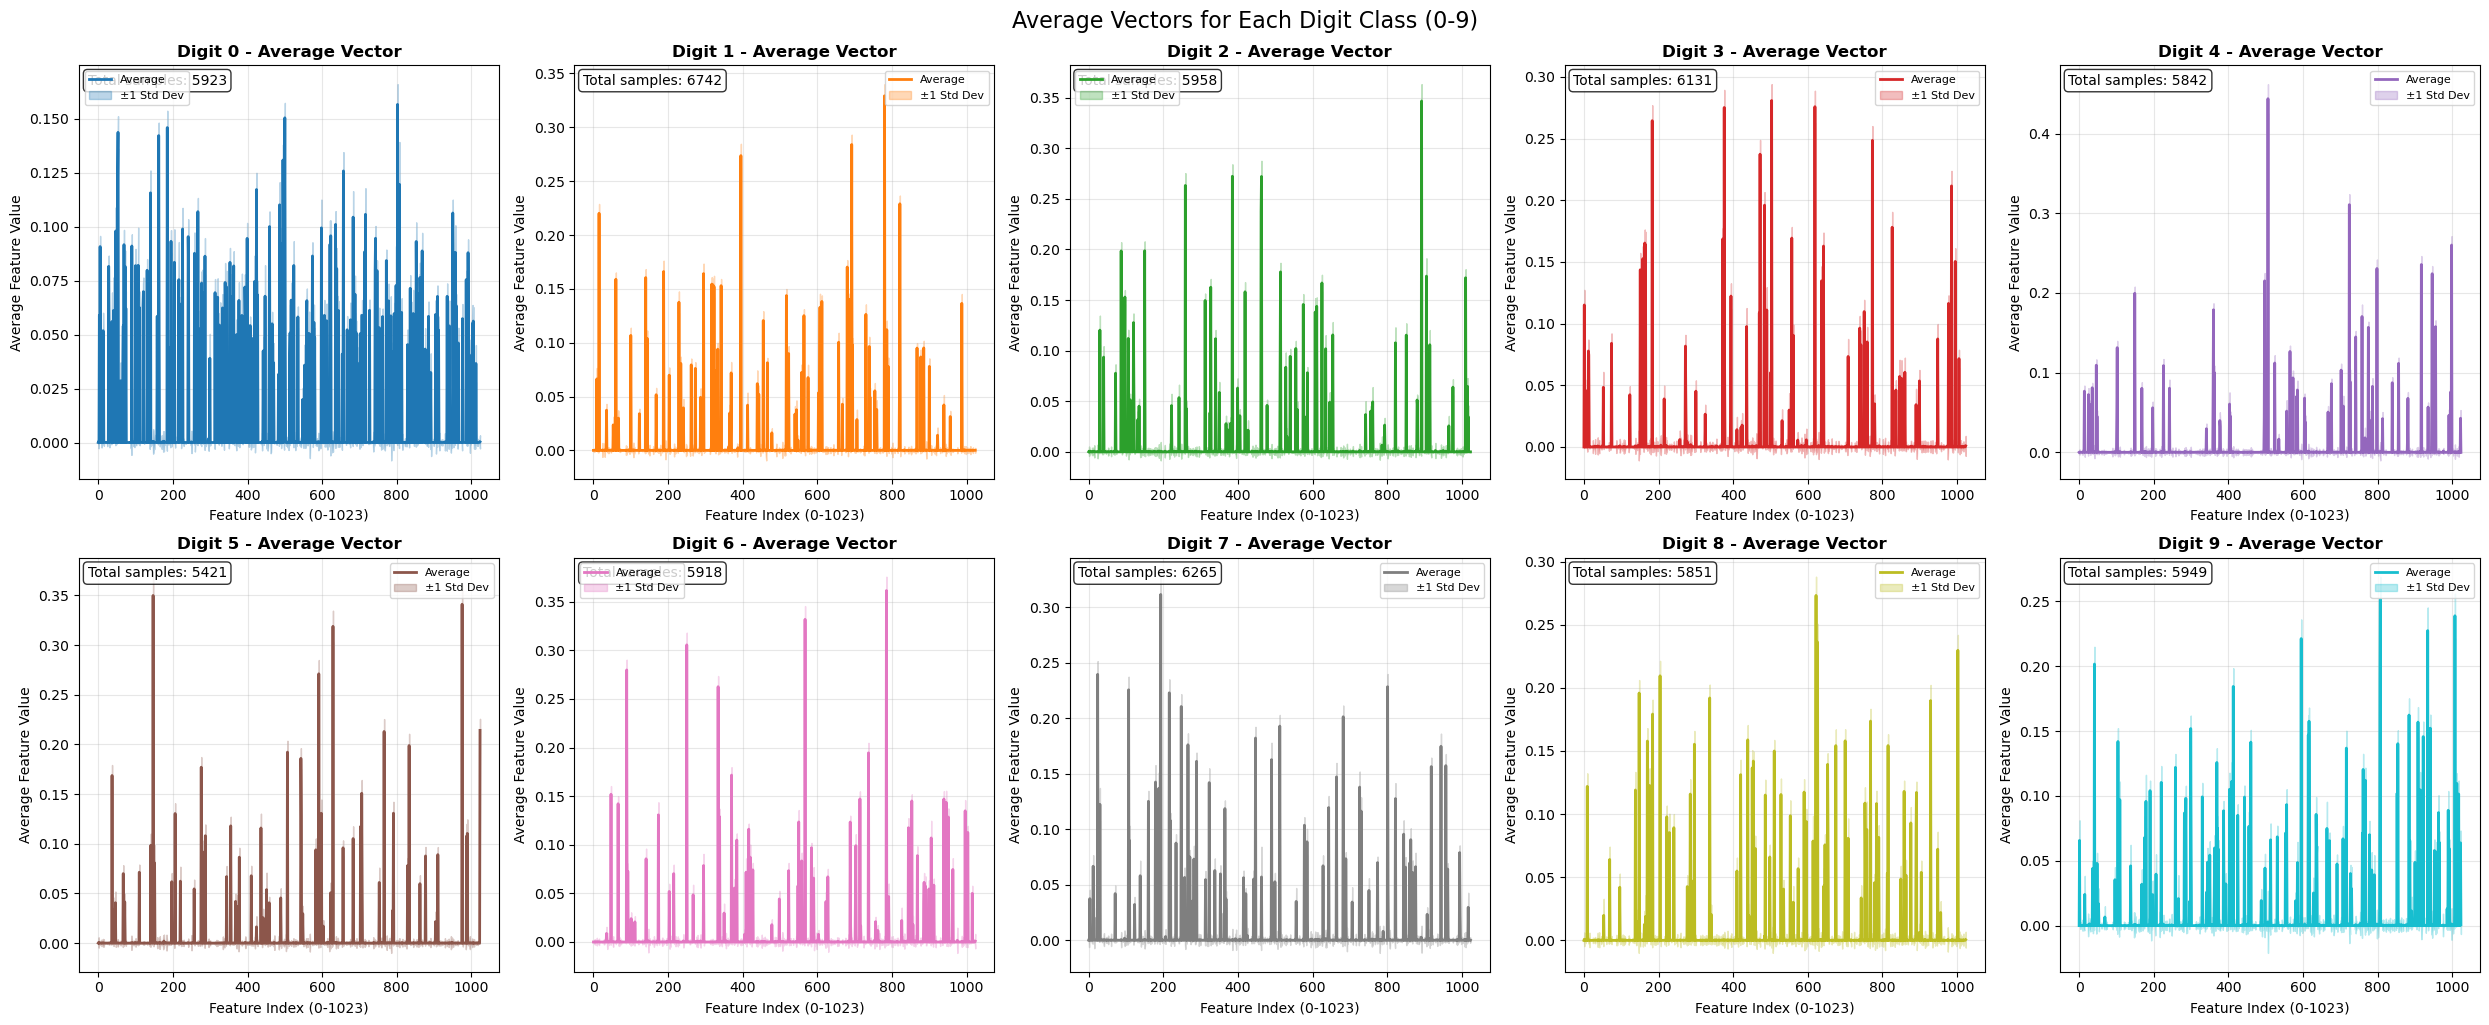

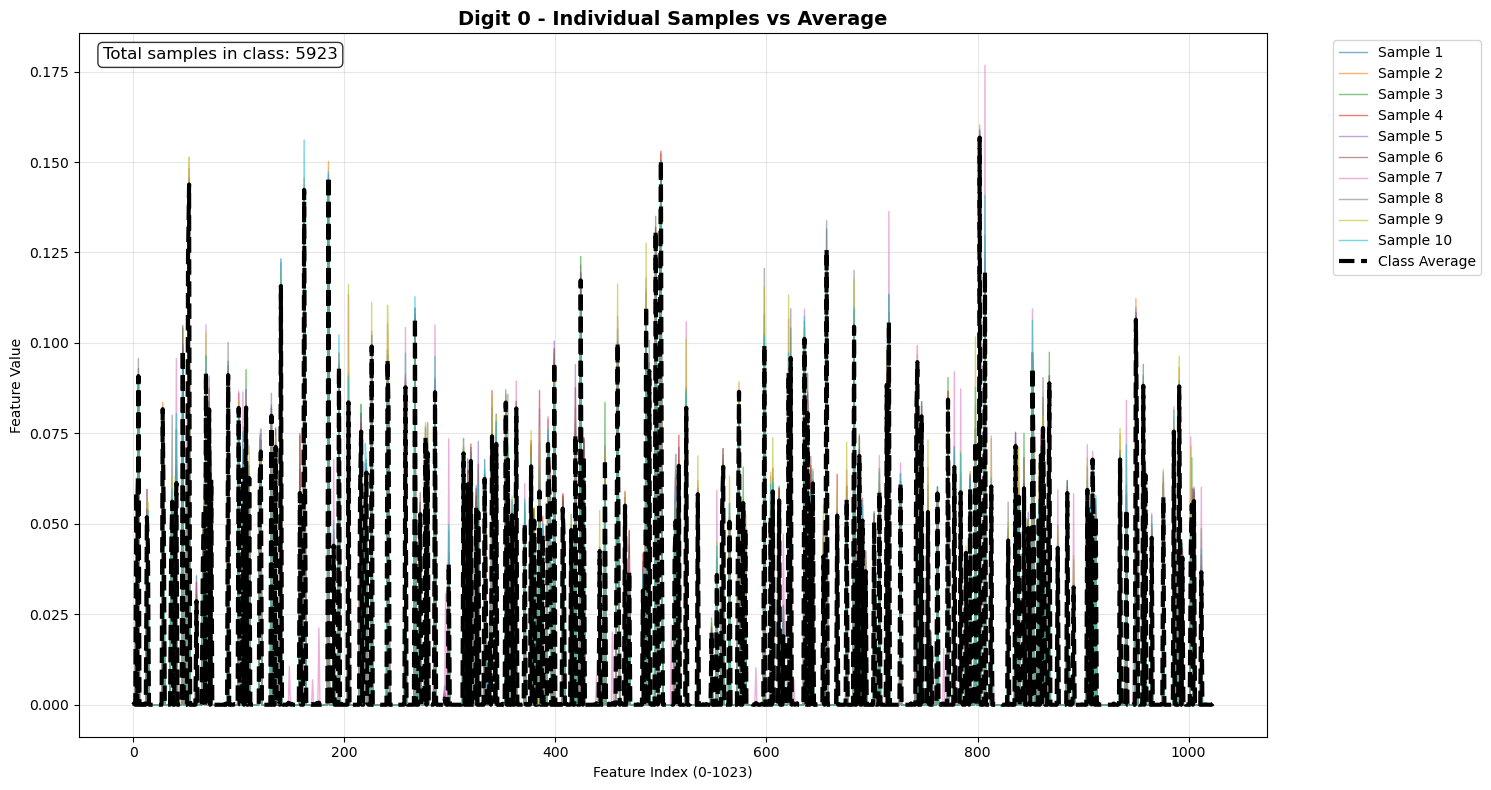

In [6]:
# Printing and Plotting the Train and Test Quantum Features in 2D Plots - 

print('Quantum Train Features' , all_norm_feats_train)
print('Quantum Test Features' , all_norm_feats_test)

# Quantum Train Features 2D Plots Per Class - 

D = [Digit_zero.shape[0] , Digit_zero.shape[0] + Digit_one.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0],Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] +Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0] + Digit_nineth.shape[0]]

import numpy as np
import matplotlib.pyplot as plt

def plot_digit_classes_samples(data_array, class_boundaries, num_samples_per_class=5):

    fig, axes = plt.subplots(2, 5, figsize=(25, 10))
    axes = axes.flatten()

    x_values = np.arange(1024)

    start_indices = [0] + class_boundaries[:-1]
    end_indices = class_boundaries
    
    for class_idx in range(10):
        ax = axes[class_idx]

        start_idx = start_indices[class_idx]
        end_idx = end_indices[class_idx]
        class_data = data_array[start_idx:end_idx]
        for i in range(min(num_samples_per_class, class_data.shape[0])):
            sample_vector = class_data[i]
            ax.plot(x_values, sample_vector, alpha=0.7, linewidth=1.0, 
                   color=f'C{i}', label=f'Sample {i+1}')
        
        ax.set_title(f'Digit {class_idx} - Sample Vectors', fontsize=12, fontweight='bold')
        ax.set_xlabel('Feature Index (0-1023)')
        ax.set_ylabel('Feature Value')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
        class_size = end_idx - start_idx
        ax.text(0.02, 0.98, f'Total samples: {class_size}', transform=ax.transAxes, 
                verticalalignment='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle('Sample Vectors from Each Digit Class (0-9)', fontsize=16, y=1.02)
    plt.show()

def plot_digit_classes_average(data_array, class_boundaries):
    fig, axes = plt.subplots(2, 5, figsize=(25, 10))
    axes = axes.flatten()
    
    x_values = np.arange(1024)
    start_indices = [0] + class_boundaries[:-1]
    end_indices = class_boundaries
    
    for class_idx in range(10):
        ax = axes[class_idx]
        
        start_idx = start_indices[class_idx]
        end_idx = end_indices[class_idx]
        
        class_data = data_array[start_idx:end_idx]
        avg_vector = np.mean(class_data, axis=0)
        std_vector = np.std(class_data, axis=0)

        ax.plot(x_values, avg_vector, linewidth=2, color=f'C{class_idx}', label='Average')
        ax.fill_between(x_values, avg_vector - std_vector, avg_vector + std_vector, 
                       alpha=0.3, color=f'C{class_idx}', label='±1 Std Dev')
        
        ax.set_title(f'Digit {class_idx} - Average Vector', fontsize=12, fontweight='bold')
        ax.set_xlabel('Feature Index (0-1023)')
        ax.set_ylabel('Average Feature Value')
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=8)
        
        class_size = end_idx - start_idx
        ax.text(0.02, 0.98, f'Total samples: {class_size}', transform=ax.transAxes, 
                verticalalignment='top', fontsize=10,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle('Average Vectors for Each Digit Class (0-9)', fontsize=16, y=1.02)
    plt.show()

def plot_single_class_comparison(data_array, class_boundaries, target_class=0, num_samples=10):
    
    start_indices = [0] + class_boundaries[:-1]
    end_indices = class_boundaries
    
    start_idx = start_indices[target_class]
    end_idx = end_indices[target_class]
    
    class_data = data_array[start_idx:end_idx]
    x_values = np.arange(1024)
    
    plt.figure(figsize=(15, 8))
    
    for i in range(min(num_samples, class_data.shape[0])):
        sample_vector = class_data[i]
        plt.plot(x_values, sample_vector, alpha=0.6, linewidth=1.0, 
                label=f'Sample {i+1}')

    avg_vector = np.mean(class_data, axis=0)
    plt.plot(x_values, avg_vector, linewidth=3, color='black', 
             label='Class Average', linestyle='--')
    
    plt.title(f'Digit {target_class} - Individual Samples vs Average', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Feature Index (0-1023)')
    plt.ylabel('Feature Value')
    plt.grid(True, alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    class_size = end_idx - start_idx
    plt.text(0.02, 0.98, f'Total samples in class: {class_size}', 
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    D = [
        Digit_zero.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0],
        Digit_zero.shape[0] + Digit_one.shape[0] + Digit_two.shape[0] + Digit_three.shape[0] + Digit_four.shape[0] + Digit_fifth.shape[0] + Digit_sixth.shape[0] + Digit_seventh.shape[0] + Digit_eigth.shape[0] + Digit_nineth.shape[0]
    ]

    plot_digit_classes_samples(all_norm_feats_train, D, num_samples_per_class=5000)
    plot_digit_classes_average(all_norm_feats_train, D)
    plot_single_class_comparison(all_norm_feats_train, D, target_class=0, num_samples=10)

# One Can Also Research on how to Generalize the polynomial Equations for these quantum Features given the dataset -
# Also Instead of using the CNN Again for finding the Test Quantum Features for new test data , one can use the code (if has sufficient compute) of the
# Bayesian All Terms Explicitly Computed to find the polynomial equations P(x_Quantum_Features|x_Amplitude Encoded) from the trained CNN and use just that 
# every time a new test data arrives to compute the quantum features , and this process of finding the UNitary of mapping and its quantum circuit can be researched
# upon to be automated in real time using graph theory etc.


In [ ]:
# Train Norm Feats and Test Norm Features are the Quantum Features extracted Out 
# Now Based on the Basic Quantum Encoding Code Shared One can alway find the 60000 Unitaries that map from the 
# Ground Qubit states to these quantum Features and then classify via a Unitary Classifier 
# And then Convert all these 60000 Train and 10000 Test Unitaries to Quantum Circuits and also the common Unitary Classifier for all into Quantum Circuit
# and then Infer the Accuracy of the MNIST Dataset on Actual Quantum Computer - (Readers can try themselves this). (But here the Paths of these 60000 and 10000 test are not corelated and hence
# though it may look like Approach 1 , it is not...)

In [ ]:
# Approach 2 - SVM Scoring Approach - Different Strategies (As done in Lagrangian NN Paper but not nonlinearity and only unitary matrices) -
# Will Be uploaded Later
